In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import re
from sklearn.neighbors import KNeighborsClassifier
import random
import seaborn as sns

In [3]:
p_stats=pd.read_csv("physical_stats_data.csv",encoding='unicode_escape')
ADCC=pd.read_csv("adcc_historical_data.csv",delimiter=";")
print(ADCC.columns)

Index(['match_id', 'winner_id', 'winner_name', 'loser_id', 'loser_name',
       'win_type', 'submission', 'winner_points', 'loser_points', 'adv_pen',
       'weight_class', 'sex', 'stage', 'year'],
      dtype='object')


In [74]:
ADCC.dropna(subset=["submission",'weight_class', 'sex'], inplace=True)
ADCC_win=ADCC[['winner_name','submission','weight_class', 'sex']]
ADCC_sub=ADCC_win.groupby("winner_name",as_index=False).agg(lambda x: pd.Series.mode(x)[0])
ADCC_sub.rename(columns={"winner_name":"Name"},inplace=True)
print(ADCC_sub.shape)


(123, 4)


In [5]:
ADCC_final=pd.merge(ADCC_sub,p_stats, on=["Name"], how="left")
missing_vals=ADCC_final[ADCC_final["Height"].isna()]["Name"]
print(missing_vals)

0                A. Cacareco
2      Abraham Marte Messina
3          Alexandre Ribeiro
4       Alexandre de Freitas
5        Ana Carolina Vieira
               ...          
119           Victor Honorio
121       Vinicius Magalhaes
122            Vitor Ribeiro
123              Vitor Viana
124              Yuri Simoes
Name: Name, Length: 91, dtype: object


Web scraping for more Athlets Stats

In [6]:
import numpy as np
import requests
import string
from bs4 import BeautifulSoup
import wikipedia
import re

name="gordon ryan"
def get_p_stats(name):
    word =name+" grappler"

    wiki_search=wikipedia.search(word)
    height=float("NAN")
    weight=float("NAN")
    if not wiki_search:
        height=float("NAN")
        weight=float("NAN")
    else:
        try:
            wiki_page=wikipedia.page(wiki_search[0])
        except:
            return height,weight
        url=wiki_page.url
        url_open = requests.get(url)
        soup=BeautifulSoup(url_open.content,"html.parser")
        details=soup('table',{'class':'infobox'})
        p = '[\d]+[.,\d]+|[\d]*[.][\d]+|[\d]+'
        for i in details:
            h=i.find_all('tr')
            for j in h:
                heading=j.find_all('th')
                detail=j.find_all('td')
                if heading is not None and detail is not None:
                    for x,y in zip(heading,detail):
                        # Getting The height
                        if x.text == "Height":
                            nums=[]
                            idx_m=y.text.find("m")
                            if idx_m != -1:
                                if re.search(p, y.text) is not None:
                                    for catch in re.finditer(p, y.text):
                                        nums.append(catch[0])
                                
                                if len(nums)>1:
                                    idx_imp=y.text.find("ft")
                                    if idx_imp < idx_m:
                                        height=float(nums[2])
                                        if height < 10:
                                            height=height*100
                                    else:
                                        height=float(nums[0])
                                        if height < 10:
                                            height=height*100
                        
                        
                        # Getting The weight
                        if x.text == "Weight":
                            # print(y.text)
                            nums=[]
                            idx_m=y.text.find("kg")
                            if idx_m != -1:
                                if re.search(p, y.text) is not None:
                                    for catch in re.finditer(p, y.text):
                                        nums.append(catch[0])
                                if len(nums)>1:
                                    idx_imp=y.text.find("lb")
                                    if idx_imp < idx_m:
                                        weight=float(nums[1])
                                    else:
                                        weight=float(nums[0])
    return height,weight 


res=get_p_stats(name)
print(res)

(188.0, 110.0)


In [7]:
height=[]
weight=[]
missing_athletes=[]
name_list=missing_vals.tolist()
# name_list=["Abraham Marte Messina"]
for name in name_list:
    print(name)
    try:
        h,w=get_p_stats(name)
        height.append(h)
        weight.append(w)
    except:
        height.append(float("NAN"))
        weight.append(float("NAN"))
        missing_athletes.append(name)


print(missing_athletes)

A. Cacareco
Abraham Marte Messina
Alexandre Ribeiro
Alexandre de Freitas
Ana Carolina Vieira
Antonio Schembri
Baret Yoshida
Beatriz Mesquita
Bianca Basilio
Bianca Mesquita
Braulio Estima
Craig Jones
Davi Ramos
David Avellan
David Terrell
Dean Lister
Demian Maia
Diego Oliveira
Eddie Bravo
Eduardo Telles
Edward Cummings
Eoghan Oflanagan
Ethan Crelinsten
Fabricio Werdum
Felipe Pena
Ffion Davies
Gabriel Napao
Gabriel Sousa
Gabrielle Garcia
Gary Tonon
Geovanny Martinez
Giancarlo Bodoni
Hayato Sakurai
Jake Shields
Jean Jacques Machado
Jeff Glover
Joao Assis
Joao Miyao
Jonathan Torres
Jose Mario Sperry
Joshua Cisneros
Kade Ruotolo
Kamil Uminski
Kendall Reusing
Kron Gracie
Leonardo Nogueira
Leonardo Santos
Leonardo Vieira
Mackenzie Dern
Mahamed Aly
Marcio Corleta
Marcio Cruz
Marcio Feitosa
Mateusz Szczecinski
Matt Serra
Micael Galvao
Mike Fowler
Nicholas Meregali
Oskar Piechota
Otavio Sousa
Pablo Popovitch
Rafael Lovato Jr
Rafael Mendes
Rany Yahya
Renzo Gracie
Ricardo Almeida
Ricardo Arona
Ric

In [8]:
df=pd.DataFrame({"name":name_list, "height":height,"weight":weight})
df.to_csv("Data/wiki_results")
print(df.isna().sum())


name       0
height    47
weight    46
dtype: int64


In [9]:
print(len(np.unique(name_list)))


91


In [10]:
df_missing=df[df["height"].isna()]
print(df_missing.head())


                    name  height  weight
1  Abraham Marte Messina     NaN     NaN
4    Ana Carolina Vieira     NaN     NaN
7       Beatriz Mesquita     NaN     NaN
8         Bianca Basilio     NaN     NaN
9        Bianca Mesquita     NaN     NaN


In [11]:
print(df.describe())

           height      weight
count   44.000000   45.000000
mean   179.818182   83.988889
std      8.311585   13.993833
min    163.000000   61.000000
25%    173.000000   76.000000
50%    180.000000   84.000000
75%    185.750000   93.000000
max    193.000000  120.000000


Wikipedia is Shit let's try google search

In [36]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import  BeautifulSoup
import requests
import os
from dotenv import load_dotenv
_ = load_dotenv()
import time
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import random

chrome_options = webdriver.ChromeOptions()
# chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()),options = chrome_options)

#  Getting rid of the cookies pop ups
# name='gordon ryan'
name='Craig Jones'
query=name.replace(" ","+")+"+bjj"+"+height"
base_url="https://www.google.com/search?q="
url=base_url+query
data = driver.get(url)
WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH,'//button[@id="L2AGLb"]'))).click()

In [13]:
def exctract_digit(str):
    p = '[\d]+[.,\d]+|[\d]*[.][\d]+|[\d]+'
    num=float(re.findall(p, str)[0])
    return num

def Extract_Result_From_Answer(driver,key):
    res=driver.find_element(By.XPATH,'//div[@class="'+key+'"]').text
    res=exctract_digit(res)
    return res

def extract_Result_From_Table(driver,unit):
    res=driver.find_element(By.XPATH,'//div[@class="webanswers-webanswers_table__webanswers-table"]').find_element(By.TAG_NAME,'table').find_element(By.XPATH,("//*[contains(text(),"+unit+")]")).text
    res=exctract_digit(res)
    return(res)

In [38]:
def extract_height(driver,name):    
    base_url="https://www.google.com/search?q="
    # sufixes=['bjj','grappler','ADCC','IBJJF','Brazilian Jiu-Jitsu','Brazilian Jiu Jitsu','Jiu-Jitsu']
    sufixes=['BJJ']
    keys=['Z0LcW t2b5Cf CfV8xf','Z0LcW t2b5Cf']
    for key in keys:
        for i in sufixes:
            query=name.replace(" ","+")+'+'+i+"+height"
            url=base_url+query
            driver.get(url)
            try:
                h=Extract_Result_From_Answer(driver,key)
                if h<10:
                    h=h*100
                return h
            except:
                pass
            try:
                time.sleep(random.randint(1,5))
                h=extract_Result_From_Table(driver,' cm')
                if h<100:
                    h=h*100
                return h
            except:
                pass
            try:
                time.sleep(random.randint(1,5))
                h=extract_Result_From_Table(driver,' m')
                if h<10:
                    h=h*100
                return h
            except:
                pass
    return float("NAN")

def extract_weight(driver,name):    
    base_url="https://www.google.com/search?q="
    # sufixes=['bjj','grappler','ADCC','IBJJF']
    key='Z0LcW t2b5Cf'
    sufixes=['BJJ']
    for i in sufixes:
        query=name.replace(" ","+")+'+'+i+"+weight"
        url=base_url+query
        driver.get(url)
        try:
            w=Extract_Result_From_Answer(driver,key)
            return w
        except:
            pass
        try:
            time.sleep(random.randint(1,5))
            w=extract_Result_From_Table(driver,' kg')
            return w
        except:
            pass
    return float("NAN")


extract_weight(driver,name)


97.0

In [39]:
from tqdm import tqdm
import random

height=[]
weight=[]
missing_athletes_google=[]
missing_athletes=df[df["height"].isna()]['name'].tolist()

for name in tqdm(missing_athletes):
    h=extract_height(driver,name)
    time.sleep(random.randint(1,10))
    w=extract_weight(driver,name)
    height.append(h)
    weight.append(w)
    time.sleep(random.randint(1,10))
    # print(f"{name} Height={h} Weight={w}")
    if np.isnan(h) or np.isnan(w):
        missing_athletes_google.append(name)



  0%|          | 0/47 [00:00<?, ?it/s]

100%|██████████| 47/47 [20:31<00:00, 26.21s/it]


In [40]:
df_google=pd.DataFrame({'name':missing_athletes, 'height':height,'weight':weight })
df_google.to_csv("data/google_reults")
print(df_google.isna().sum())

name       0
height    36
weight    41
dtype: int64


In [41]:
print(df_google.describe())

           height     weight
count   11.000000   6.000000
mean   178.363636  77.333333
std     11.681376  12.290918
min    160.000000  66.000000
25%    171.500000  67.000000
50%    178.000000  75.500000
75%    186.000000  83.250000
max    198.000000  97.000000


In [43]:
missing_athletes_google=df_google[df_google["height"].isna()]['name'].tolist()


It looks like The heights and weight are going to be a bitch to find Let's move on and replace them with weigh category and median height for competitor for the same category 

In [44]:
print(ADCC_final.head())

                    Name  submission weight_class sex  Height     Weight
0            A. Cacareco  Guillotine          ABS   M     NaN        NaN
1          Aaron Johnson    Footlock          ABS   M  185.42  above 100
2  Abraham Marte Messina    Triangle        +99KG   M     NaN        NaN
3      Alexandre Ribeiro      Armbar         99KG   M     NaN        NaN
4   Alexandre de Freitas      Armbar         66KG   M     NaN        NaN


In [45]:
# Let's merge the results
df_google=pd.read_csv("Data/google_reults")
df_wiki=pd.read_csv("Data/wiki_results")
Data_set_final=pd.concat([df_google, df_wiki])
Data_set_final.drop(columns=['Unnamed: 0'],inplace=True)
Data_set_final.rename(columns={"name":"Name"},inplace=True)
print(Data_set_final.describe())


           height      weight
count   55.000000   51.000000
mean   179.527273   83.205882
std      8.979100   13.860915
min    160.000000   61.000000
25%    173.000000   71.500000
50%    180.000000   83.000000
75%    186.000000   92.800000
max    198.000000  120.000000


In [46]:
print(ADCC_final.dtypes)

Name             object
submission       object
weight_class     object
sex              object
Height          float64
Weight           object
dtype: object


In [47]:
# Adding weight category to fill in the missing weights
Data_set_final=Data_set_final.merge(ADCC_final[['Name','submission','weight_class','sex']], on=["Name"], how="left")


Let's clean up the data


In [48]:
fillers=Data_set_final[['height', 'weight','sex','weight_class']].groupby(['sex','weight_class']).mean()
print(fillers)


                      height     weight
sex weight_class                       
F   +60KG         187.000000        NaN
    60KG          161.500000        NaN
M   +99KG         187.625000  99.142857
    66KG          171.555556  72.900000
    77KG          176.900000  73.622222
    88KG          181.416667  84.750000
    99KG          185.666667  90.288889
    ABS           175.500000  82.075000


In [49]:
#  it looks like we don't have the average weight for female grapples for -60KG Let's just replace it with 60
fillers.fillna(60,inplace=True)
print(fillers)

                      height     weight
sex weight_class                       
F   +60KG         187.000000  60.000000
    60KG          161.500000  60.000000
M   +99KG         187.625000  99.142857
    66KG          171.555556  72.900000
    77KG          176.900000  73.622222
    88KG          181.416667  84.750000
    99KG          185.666667  90.288889
    ABS           175.500000  82.075000


In [50]:
# Lets's fill up
Data_set_final['height'].fillna(Data_set_final[['height','sex','weight_class']].groupby(['sex','weight_class'])['height'].transform('mean'),inplace=True)
Data_set_final['weight'].fillna(Data_set_final[['weight','sex','weight_class']].groupby(['sex','weight_class'])['weight'].transform('mean'),inplace=True)
print(Data_set_final[Data_set_final['weight'].isna()][['sex','weight_class']])
# All Nan are in the female -60KG Lets fill it up with 60KG 
Data_set_final['weight'].fillna(60,inplace=True)
Data_set_final.to_csv('Data/Data_set_final')
print(Data_set_final.describe())

   sex weight_class
1    F        +60KG
2    F         60KG
3    F         60KG
4    F         60KG
14   F         60KG
15   F        +60KG
24   F        +60KG
27   F         60KG
51   F        +60KG
54   F         60KG
55   F         60KG
56   F         60KG
72   F         60KG
75   F        +60KG
90   F        +60KG
95   F         60KG
           height      weight
count  138.000000  138.000000
mean   178.216405   79.261565
std      8.233264   12.694357
min    160.000000   60.000000
25%    171.555556   72.900000
50%    176.900000   76.000000
75%    185.666667   87.500000
max    198.000000  120.000000


In [51]:
print(Data_set_final.isna().sum())
print(Data_set_final.head())

Name            0
height          0
weight          0
submission      0
weight_class    0
sex             0
dtype: int64
                    Name   height     weight   submission weight_class sex
0  Abraham Marte Messina  187.625  99.142857     Triangle        +99KG   M
1    Ana Carolina Vieira  187.000  60.000000  Short choke        +60KG   F
2       Beatriz Mesquita  161.500  60.000000          RNC         60KG   F
3         Bianca Basilio  160.000  60.000000   Cross face         60KG   F
4        Bianca Mesquita  161.500  60.000000          RNC         60KG   F


In [80]:
print(Data_set_final.columns)

Index(['Name', 'height', 'weight', 'submission', 'weight_class', 'sex',
       'gender'],
      dtype='object')


In [78]:
Data_set_final=pd.read_csv('Data/Data_set_final',index_col=[0])

Data_set_final['gender']=(Data_set_final['sex']=='M')


Data_set_clean=Data_set_final



In [79]:
print(Data_set_clean['submission'].value_counts())

submission
RNC                  30
Armbar               30
Guillotine           14
Footlock             14
Heel hook             7
Triangle              6
Outside heel hook     5
Toe hold              4
Kneebar               3
Choke                 3
Submission            3
D'arce choke          3
Calf slicer           3
Kimura                2
Dogbar                2
Americana             2
Inside heel hook      2
Short choke           2
Cross face            2
Omoplata              1
Name: count, dtype: int64


In [80]:
count=dict(Data_set_clean['submission'].value_counts())
Data_set_clean['sub_count']=Data_set_clean['submission']
Data_set_clean['sub_count']=Data_set_clean['submission'].map(count)

In [81]:
print(Data_set_clean.head())

                    Name   height     weight   submission weight_class sex  \
0  Abraham Marte Messina  187.625  99.142857     Triangle        +99KG   M   
1    Ana Carolina Vieira  187.000  60.000000  Short choke        +60KG   F   
2       Beatriz Mesquita  161.500  60.000000          RNC         60KG   F   
3         Bianca Basilio  160.000  60.000000   Cross face         60KG   F   
4        Bianca Mesquita  161.500  60.000000          RNC         60KG   F   

   gender  sub_count  
0    True          6  
1   False          2  
2   False         30  
3   False          2  
4   False         30  


In [82]:
Data_set_clean.drop(Data_set_clean[Data_set_clean['sub_count']<10].index,inplace=True)
Data_set_clean.drop(Data_set_clean[Data_set_clean['submission']=='Submission'].index,inplace=True)
Data_set_clean.drop(columns=['sub_count'],inplace=True)
Data_set_clean.to_csv('Data/data_set_training')

In [83]:
print(Data_set_clean['submission'].value_counts())

submission
RNC           30
Armbar        30
Guillotine    14
Footlock      14
Name: count, dtype: int64


In [85]:
#  Let's get training
from sklearn.model_selection import ShuffleSplit, train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score,precision_score,recall_score

Data_set_clean=pd.read_csv('Data/data_set_training',index_col=[0])
features=features=['height', 'weight','gender']
# features=features=['height', 'weight']
X=Data_set_clean[features].to_numpy()
y=Data_set_clean['submission']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [86]:
Data_set_clean['sex'].value_counts()

sex
M    80
F     8
Name: count, dtype: int64

c:\Users\hbkha\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


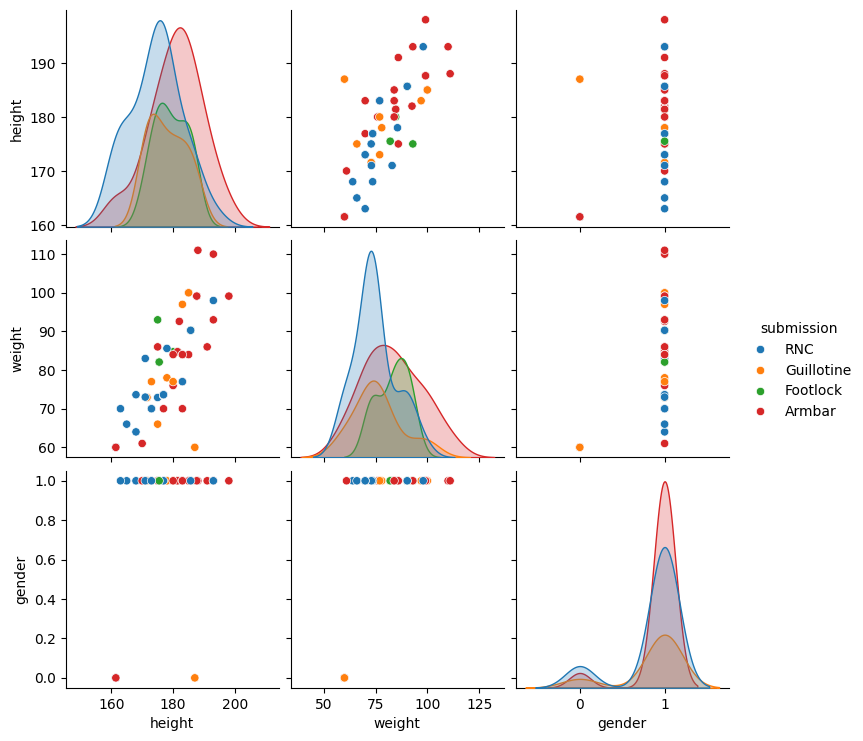

In [87]:
sns.pairplot(Data_set_clean,hue='submission',vars=features,kind='scatter')

Accuracy: 0.5
Precision: 0.7037037037037037
Recall: 0.5


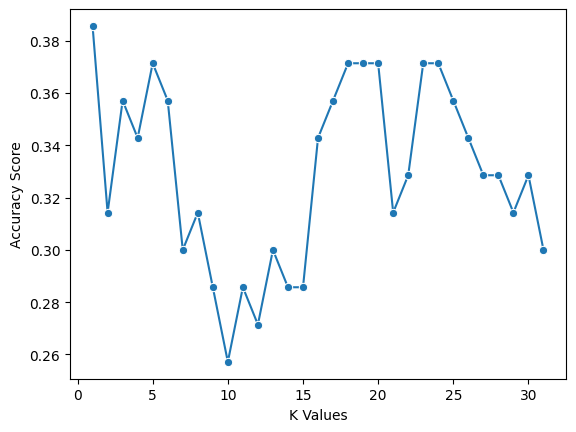

In [113]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# X_train=df_train[features].to_numpy()
# Y_train=df_train['submission']

# X_test=df_test[features].to_numpy()
# Y_test=df_test['submission']

k_values = [i for i in range (1,32)]
scores = []
ss = ShuffleSplit(n_splits=10, test_size=0.1, random_state=1)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=ss)
    scores.append(np.mean(score))
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")


best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
X=scaler.fit_transform(X)
knn.fit(X, y)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted',zero_division=0.0)
recall = recall_score(y_test, y_pred,average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

In [114]:

from sklearn.tree import DecisionTreeClassifier, plot_tree
scores = []
clf = DecisionTreeClassifier(criterion='entropy')
score = cross_val_score(clf, X_train, y_train, cv=ss)


clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted',zero_division=0.0)
recall = recall_score(y_test, y_pred,average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
    


Accuracy: 0.6111111111111112
Precision: 0.692063492063492
Recall: 0.6111111111111112


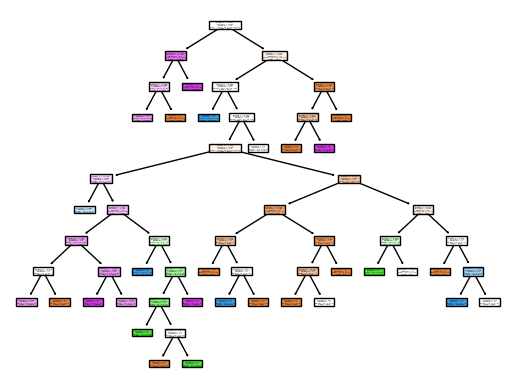

In [116]:
plot_tree(clf,feature_names=features,class_names=Data_set_clean['submission'].unique().tolist(),filled=True)
plt.savefig('out.pdf')

In [77]:
Data_set_clean['submission'].unique().tolist()

['RNC', 'Guillotine', 'Footlock', 'Armbar']